In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 21.7MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.0MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [7]:
#generators -> this divides the large dataset into batches so that it suits the training

train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
#Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [20]:
# Creat CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 68s 102ms/step - loss: 1.3396 - accuracy: 0.6018 - val_loss: 0.6084 - val_accuracy: 0.6842
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5498 - accuracy: 0.7219 - val_loss: 0.5258 - val_accuracy: 0.7382
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4639 - accuracy: 0.7780 - val_loss: 0.4692 - val_accuracy: 0.7856
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3961 - accuracy: 0.8201 - val_loss: 0.8489 - val_accuracy: 0.6366
Epoch 5/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3377 - accuracy: 0.8530 - val_loss: 0.4619 - val_accuracy: 0.7872
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2874 - accuracy: 0.8788 - val_loss: 0.4934 - val_accuracy: 0.7822
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.1914 - accuracy: 0.9231 - val_loss: 0.7557 - val_ac

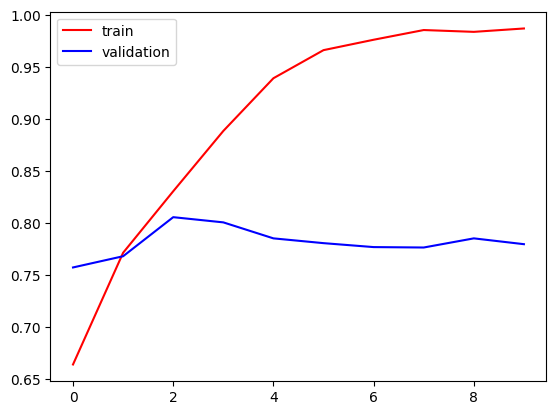

In [19]:
import matplotlib.pyplot as plt
#Before optimaization
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

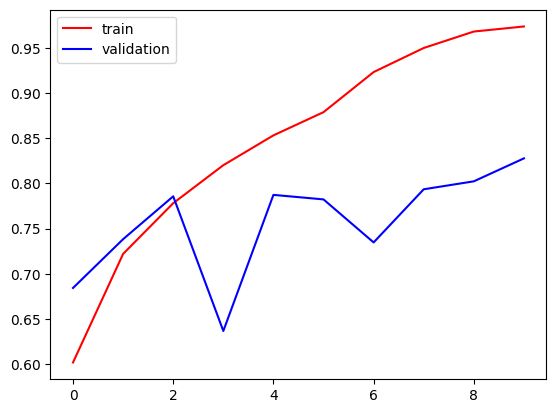

In [24]:
#After Optimization
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [25]:
import cv2

In [65]:
test_img = cv2.imread('/content/cat.jpg')

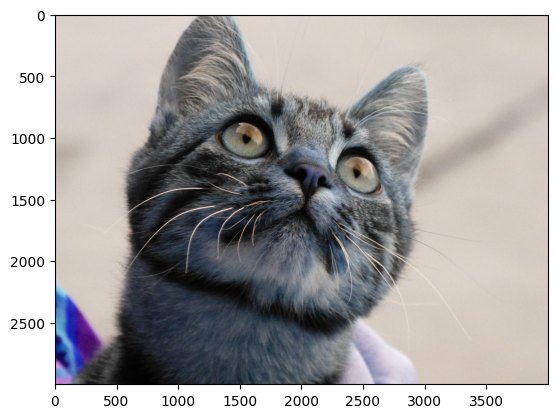

In [66]:
plt.imshow(test_img)

In [67]:
test_img.shape

(3000, 4000, 3)

In [68]:
test_img = cv2.resize(test_img,(256,256))

In [69]:
test_img.shape

(256, 256, 3)

In [70]:
test_input = test_img.reshape((1,256,256,3))

In [71]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)